### Alan Hurtarte      
#### 19000590
 
#### Ciencia de datos en Python
# Proyecto 
---

In [5]:
"""
Created on Sun Mar 31 20:09:24 2019

@author: Alan Hurtarte
"""
import warnings; warnings.simplefilter('ignore')
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

data = np.load('proyecto_training_data.npy')
train_data_length = (int)(data.shape[0] * 0.8)
train_data = data[0:train_data_length,:]
test_data = data[train_data_length:,:]

sale_price_td = train_data[:,0]
overall_quality_td = train_data[:,1]
first_floor_square_feet_td = train_data[:,2]
total_rooms_td = train_data[:,3]
year_built_td = train_data[:,4]
loat_front_td = np.nan_to_num(train_data[:,5])

sale_price_test_d = test_data[:,0]
overall_quality_test_d = test_data[:,1]
first_floor_square_feet_test_d = test_data[:,2]

data_labels = ["Sales Price", "Overall material and finish quality", 'First Floor square feet', 'Total rooms above grade', 'Original construction date', 'Linear feet of street connected to property']


def get_mean_max_min_range_dv(nd_array):
    mean = np.mean(nd_array)
    c_max = np.max(nd_array)
    c_min = np.min(nd_array)
    c_range = np.ptp(nd_array)
    dv = np.std(nd_array)
    return (mean, c_max, c_min, c_range, dv)

def statistics_outputter(statistics, name):
    print('Statistics of %s' % name)
    print('Mean: %f' % statistics[0])
    print('Max: %f' % statistics[1])
    print('Min: %f' % statistics[2])
    print('Range: %f' % statistics[3])
    print('Standar deviation: %f' % statistics[4])

def print_hr():
    print('***************************************************')

print_hr()
statistics_outputter(get_mean_max_min_range_dv(sale_price_td), data_labels[0])
print_hr()
statistics_outputter(get_mean_max_min_range_dv(overall_quality_td), data_labels[1])
print_hr()
statistics_outputter(get_mean_max_min_range_dv(first_floor_square_feet_td), data_labels[2])
print_hr()
statistics_outputter(get_mean_max_min_range_dv(total_rooms_td), data_labels[3])
print_hr()
statistics_outputter(get_mean_max_min_range_dv(year_built_td), data_labels[4])
print_hr()
statistics_outputter(get_mean_max_min_range_dv(loat_front_td), data_labels[5])


***************************************************
Statistics of Sales Price
Mean: 180590.277397
Max: 755000.000000
Min: 34900.000000
Range: 720100.000000
Standar deviation: 78781.951080
***************************************************
Statistics of Overall material and finish quality
Mean: 6.101027
Max: 10.000000
Min: 1.000000
Range: 9.000000
Standar deviation: 1.377435
***************************************************
Statistics of First Floor square feet
Mean: 1156.323630
Max: 3228.000000
Min: 334.000000
Range: 2894.000000
Standar deviation: 373.620332
***************************************************
Statistics of Total rooms above grade
Mean: 6.485445
Max: 14.000000
Min: 2.000000
Range: 12.000000
Standar deviation: 1.608452
***************************************************
Statistics of Original construction date
Mean: 1971.451199
Max: 2010.000000
Min: 1875.000000
Range: 135.000000
Standar deviation: 29.938882
***************************************************
Statistic

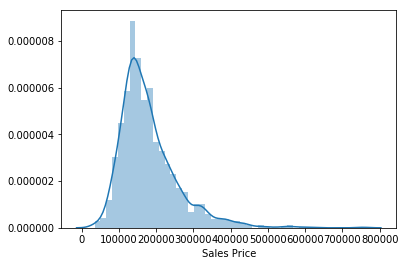

In [6]:
sale_price_td_pd = pd.Series(sale_price_td, name=data_labels[0])
ax = sns.distplot(sale_price_td_pd)

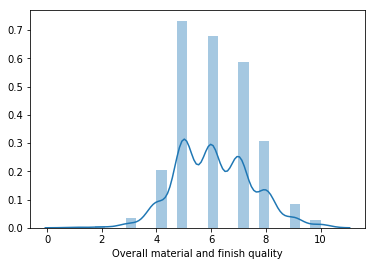

In [7]:
overall_quality_td_pd = pd.Series(overall_quality_td, name=data_labels[1])
sns.distplot(overall_quality_td_pd)


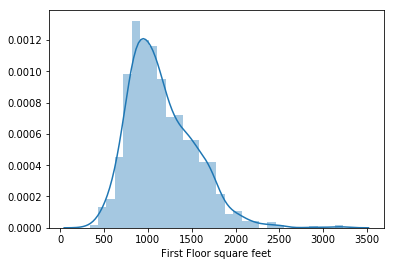

In [8]:
first_floor_square_feet_td_pd = pd.Series(first_floor_square_feet_td, name=data_labels[2])
sns.distplot(first_floor_square_feet_td_pd)

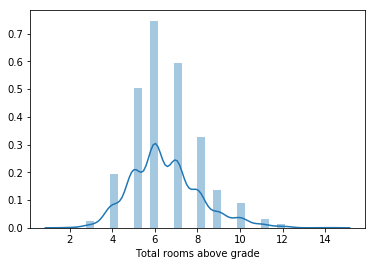

In [9]:
total_rooms_td_pd = pd.Series(total_rooms_td, name=data_labels[3])
sns.distplot(total_rooms_td_pd)

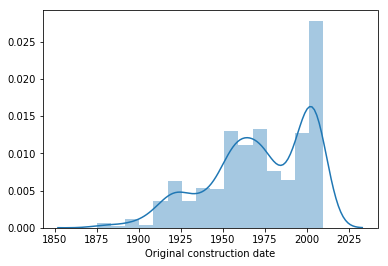

In [10]:
year_built_td_pd = pd.Series(year_built_td, name=data_labels[4])
sns.distplot(year_built_td_pd)

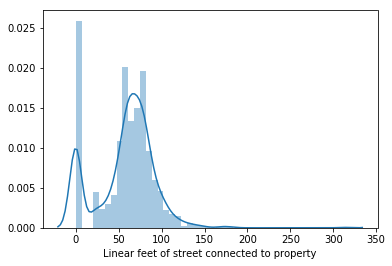

In [11]:
loat_front_td_pd = pd.Series(loat_front_td, name=data_labels[5])
sns.distplot(loat_front_td_pd)

***************************************************


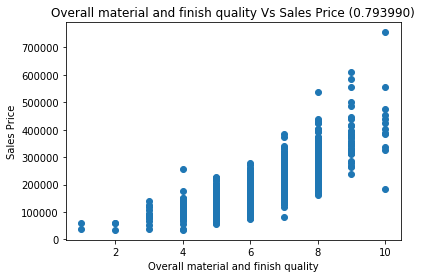

***************************************************


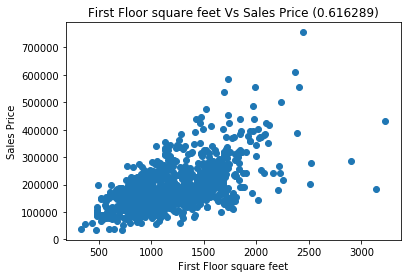

***************************************************


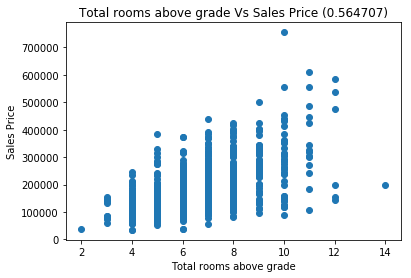

***************************************************


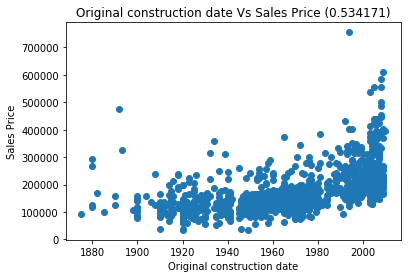

***************************************************


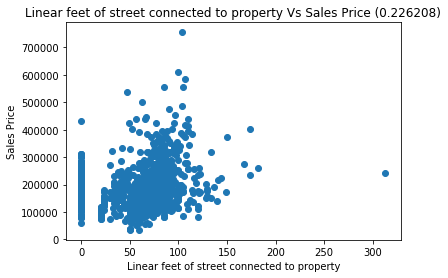

In [12]:

def add_scatter_plot(x, y,x_label, y_label):
    corr_coef = np.corrcoef(x, y)
    
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1) 
    
    ax.scatter(x, y)
    
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    ax.set_title('%s Vs %s (%f)' % (x_label, y_label, corr_coef[0,1]))

    plt.show()    
    
print_hr()
add_scatter_plot(overall_quality_td, sale_price_td, data_labels[1], data_labels[0])

print_hr()
add_scatter_plot(first_floor_square_feet_td, sale_price_td, data_labels[2], data_labels[0])

print_hr()
add_scatter_plot(total_rooms_td, sale_price_td, data_labels[3], data_labels[0])

print_hr()
add_scatter_plot(year_built_td, sale_price_td, data_labels[4], data_labels[0])

print_hr()
add_scatter_plot(loat_front_td, sale_price_td, data_labels[5], data_labels[0])


Las 2 variables con mayor coeficiente de correlación son `Overall Material and Finish Quality` y `First Floor square feet`

## Definición de funciones

In [63]:
def train_model(x_nd_array, y_nd_array, epochs, imprimir_error_cada, learning_rate):
    mat = np.column_stack((x_nd_array, np.ones_like(x_nd_array)))
    parameter_arr = {}
    error_arr = []
    m = np.mean(y_nd_array) / np.mean(x_nd_array)
    b = y_nd_array - m*x_nd_array
    model = [m, np.mean(b)]
    
    for i in range(epochs):
        parameter_arr[i] = model
        y_hat = np.matmul(mat, model)
        error = (0.5)*np.mean(np.power((y_hat - y_nd_array) , 2))
        
        if i % imprimir_error_cada == 0:
            print(error)
        
        error_arr.append(error)
        
        gradiente_m = np.mean((y_hat - y_nd_array)*x_nd_array)
        gradiente_b = np.mean(y_hat - y_nd_array)
        gradient = np.array([gradiente_m, gradiente_b])
        
        model = model - (learning_rate*gradient)
    
    return parameter_arr, error_arr

def add_error_gragh(train_data_parameter_arr,train_data_error, label_title):
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1) 
    
    
    ax.grid()
    ax.set_xlim(0, len(train_data_parameter_arr))
    ax.set_ylim(np.min(train_data_error), np.max(train_data_error))
    ax.plot(list(range(0, len(train_data_parameter_arr))), train_data_error)
    ax.set_xlabel('# de iteración')
    ax.set_ylabel('Error')
    ax.set_title(label_title)
    
    plt.show() 


def model_in_time(parameter_arr,x, n, label_title):

    for i in range(len(parameter_arr)):    
        if i % n == 0:             
            fig = plt.figure()
            x_ax = []
            y_ax = []
            for j in range((int)(np.max(x))):
                x_ax.append(j)
                y_ax.append(parameter_arr[i][0]*j + parameter_arr[i][1])
            
            
            ax = fig.add_subplot(1, 1, 1)
            plt.plot(x_ax, y_ax, label = 'modelo')
            
            plt.scatter(x, sale_price_td, label = label_title,  color=[1, 0, 0],)
            
            ax.legend()
            ax.set_xlabel('x')
            ax.set_ylabel('y')
            plt.show()
        

## Graficando las 2 variables elegidas

1384101154.495657


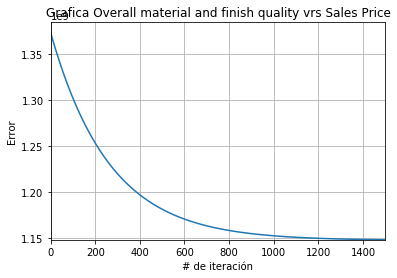

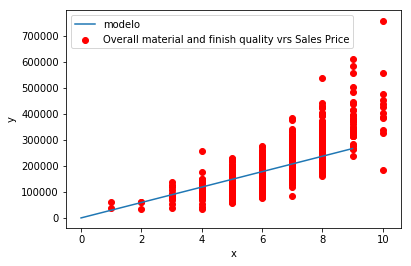

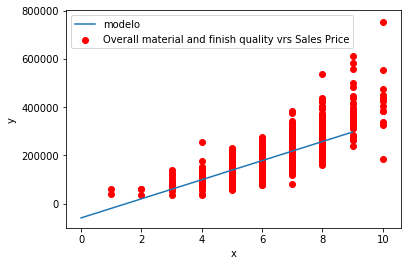

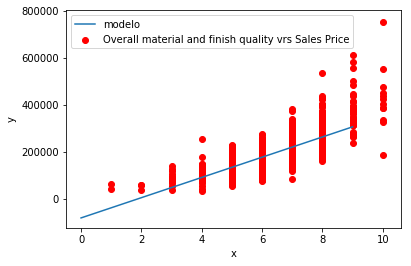

***************************************************
1972631150.4782598


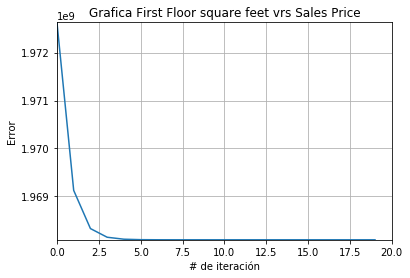

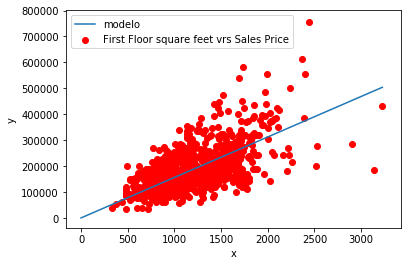

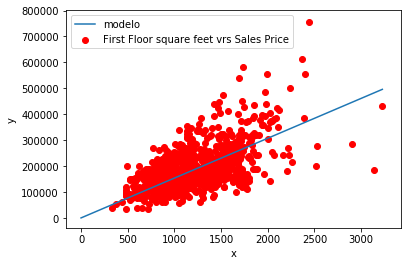

In [64]:
overall_n = 1500
modelos_overall_quality, errores_overall_quality = train_model(overall_quality_td, sale_price_td, overall_n, overall_n, 0.04)
add_error_gragh(modelos_overall_quality, errores_overall_quality, 'Grafica %s vrs %s' %(data_labels[1], data_labels[0]))
model_in_time(modelos_overall_quality, overall_quality_td, overall_n / 3 , '%s vrs %s' %(data_labels[1], data_labels[0]))
print_hr()
first_square_n = 20
modelos_first_floor_square, errores_first_floor_square = train_model(first_floor_square_feet_td, sale_price_td, first_square_n, first_square_n, 0.000001)
add_error_gragh(modelos_first_floor_square, errores_first_floor_square, 'Grafica %s vrs %s' %(data_labels[2], data_labels[0]))
model_in_time(modelos_first_floor_square, first_floor_square_feet_td, first_square_n / 2, '%s vrs %s' %(data_labels[2], data_labels[0]))


## scikit-learn

In [65]:
model_scikit_overall = LinearRegression().fit(overall_quality_td.reshape(-1,1), sale_price_td)
model_scikit_first_feet = LinearRegression().fit(first_floor_square_feet_td.reshape(-1,1), sale_price_td)

In [66]:
def calculate_prediction(manual_model, scikit_model, x):
    pred_manual_model = manual_model[0]*x + manual_model[1]
    pred_scikit = scikit_model.predict(x.reshape(-1,1))
    
    return pred_manual_model, pred_scikit, (pred_manual_model + pred_scikit)/2

def add_prediction_graph(x, manual_y, scikit_y, average):
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    plt.plot(x, manual_y, label = 'Manual')
    plt.plot(x, scikit_y, label = 'Scikit', color=[1, 0, 0])
    plt.plot(x, average, label = 'Average', color=[1, 0, 1])
    
    ax.legend() #si no ejecutamos la función "legend" , no se mostraran los labels usados con plot
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    plt.show()   


### Overall quality

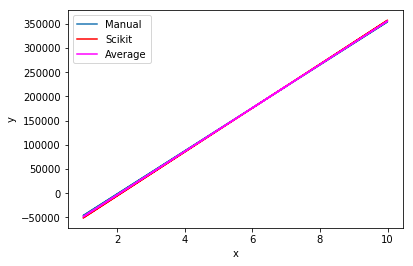

In [67]:
pred_overall_manual, pred_overall_scikit, pred_overall_mean = calculate_prediction(modelos_overall_quality[overall_n - 1],model_scikit_overall, overall_quality_td)    
add_prediction_graph(overall_quality_td, pred_overall_manual, pred_overall_scikit, pred_overall_mean)

### First Floor square feet

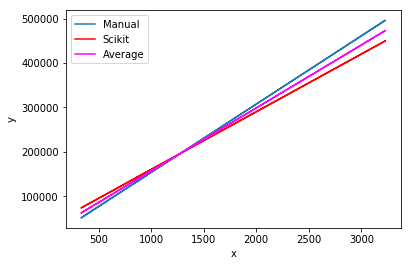

In [68]:
pred_fsf_manual, pred_fsf_scikit, pred_fsq_mean = calculate_prediction(modelos_first_floor_square[first_square_n - 1],model_scikit_first_feet, first_floor_square_feet_td)    
add_prediction_graph(first_floor_square_feet_td, pred_fsf_manual, pred_fsf_scikit, pred_fsq_mean)


## Calculando errores con datos de validación

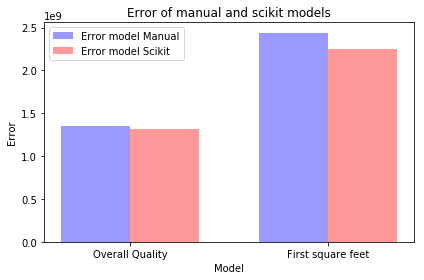

In [69]:
def calculate_error_against_test_data(predicted_y, test_y):
    return 0.5 * np.mean(np.power(test_y - predicted_y, 2))


model_scikit_overall_test_data = LinearRegression().fit(overall_quality_test_d.reshape(-1,1), sale_price_test_d)
pred_overall_manual_test_data, pred_overall_scikit_test_data, pred_overall_mean_test_data = calculate_prediction(modelos_overall_quality[499],model_scikit_overall_test_data, overall_quality_test_d)
error_overall_manual = calculate_error_against_test_data(pred_overall_manual_test_data, sale_price_test_d)
error_overall_scikit = calculate_error_against_test_data(pred_overall_scikit_test_data, sale_price_test_d)

model_scikit_fsf_test_data = LinearRegression().fit(first_floor_square_feet_test_d.reshape(-1,1), sale_price_test_d)
pred_fsf_manual_test_data, pred_fsf_scikit_test_data, pred_fsf_mean_test_data = calculate_prediction(modelos_first_floor_square[19],model_scikit_fsf_test_data, first_floor_square_feet_test_d)
error_fsf_manual = calculate_error_against_test_data(pred_fsf_manual_test_data, sale_price_test_d)
error_fsf_scikit = calculate_error_against_test_data(pred_fsf_scikit_test_data, sale_price_test_d)


fig, ax = plt.subplots()
manual_errors = (error_overall_manual, error_fsf_manual)
scikit_errors = (error_overall_scikit, error_fsf_scikit)
bar_width = 0.35
opacity = 0.4
index = np.arange(2)
error_config = {'ecolor': '0.3'}

rects1 = ax.bar(index, manual_errors, bar_width,
                alpha=opacity, color='b',
                label='Error model Manual')

rects2 = ax.bar(index + bar_width, scikit_errors, bar_width,
                alpha=opacity, color='r',
                label='Error model Scikit')

ax.set_xlabel('Model')
ax.set_ylabel('Error')
ax.set_title('Error of manual and scikit models')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(('Overall Quality', 'First square feet'))
ax.legend()

fig.tight_layout()
plt.show()

# Conclusión

El modelo que muestra menos error es al realacionar las variables `Overal quality` con `Sales Prices`, construyendo el modelo con `scikit learn`. Cabe mencionar que era de esperar que esa relación fuera la correcta pues mostraba una mayor correlación que las variables `First Square Feet` y `Sales Prices`.

Sigue siendo un error bastante alto a mi parecer, `1e9` es un número muy grande para tomar desiciones, sin embargo creo que podría ser una buena guía.